# Airline Passenger Satisfaction  

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')

## Read data

In [2]:
data = pd.read_csv("test.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## How many data points that have null value

In [4]:
data.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [5]:
print(data['satisfaction'].value_counts())

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64


## Drop data points that have null value

In [6]:
data = data.dropna()
data = data.reset_index()

In [7]:
print(data['satisfaction'].value_counts())

neutral or dissatisfied    14528
satisfied                  11365
Name: satisfaction, dtype: int64


In [8]:
data.isna().sum()

index                                0
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction             

## Drop feature that have no relation with our target

In [9]:
data = data.drop('id', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('Age', axis = 1)
data = data.drop('index', axis = 1)
data = data.drop('Gender', axis = 1)

## Drop duplicate data points

In [10]:
data = data.drop_duplicates()

In [11]:
print(data['satisfaction'].value_counts())

neutral or dissatisfied    14528
satisfied                  11364
Name: satisfaction, dtype: int64


## To balance our data

In [12]:
i = 0
count = 0
while True:
    d = data['satisfaction'][i]
    #print(d + '\t')
    #print(i)
    if d == 'neutral or dissatisfied' and count != 3000:
        data=data.drop(i, axis = 0, inplace = False)
        count+=1
    i+=1
    if count == 3000:
        break

In [13]:
print(data.shape)

(22892, 21)


In [14]:
#data.to_csv('file1.csv')

In [15]:
print(data['satisfaction'].value_counts())

neutral or dissatisfied    11528
satisfied                  11364
Name: satisfaction, dtype: int64


In [16]:
data.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Business travel,Eco,160,5,4,3,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Loyal Customer,Business travel,Business,2863,1,1,3,1,5,4,...,4,4,4,4,3,4,5,0,0.0,satisfied
3,Loyal Customer,Business travel,Business,3377,0,0,0,2,3,4,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Loyal Customer,Business travel,Eco,1182,2,3,4,3,4,1,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Loyal Customer,Business travel,Eco,311,3,3,3,3,5,5,...,5,4,3,1,1,2,5,0,0.0,satisfied


## Transform categories data points into numbers

In [17]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
encode=['Customer Type','Type of Travel', 'Class', 'satisfaction']
for i in encode:
    data[i] = label_encoder.fit_transform(data[i])

In [18]:
data.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1,160,5,4,3,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,0,2863,1,1,3,1,5,4,...,4,4,4,4,3,4,5,0,0.0,1
3,0,0,0,3377,0,0,0,2,3,4,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,1,1182,2,3,4,3,4,1,...,2,2,2,2,4,2,4,0,20.0,1
5,0,0,1,311,3,3,3,3,5,5,...,5,4,3,1,1,2,5,0,0.0,1


## Set the features

In [19]:
X =data.iloc[:,:-1]

## Set the target

In [20]:
y =data.iloc[:, -1].values

## Split data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic regression model

In [22]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

/Users/mohand/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
regressor_pred = regressor.predict(X_test)

Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2341
           1       0.80      0.84      0.82      2238

    accuracy                           0.82      4579
   macro avg       0.82      0.82      0.82      4579
weighted avg       0.82      0.82      0.82      4579





<AxesSubplot:title={'center':'Confusion matrix'}>

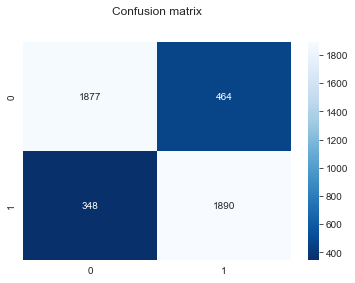

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Logistic Regression' + '\n')
print(classification_report(y_test,regressor_pred))
print('\n')
plt.title('Confusion matrix', y=1.1)
sns.heatmap(confusion_matrix(y_test,regressor_pred),cmap='Blues_r',annot=True,fmt='g')

##  K nearest neighbors model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 7, p = 2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
KNN_pred = KNN.predict(X_test)

K Nearest Neighbours

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      2341
           1       0.73      0.69      0.71      2238

    accuracy                           0.72      4579
   macro avg       0.72      0.72      0.72      4579
weighted avg       0.72      0.72      0.72      4579





<AxesSubplot:title={'center':'Confusion matrix'}>

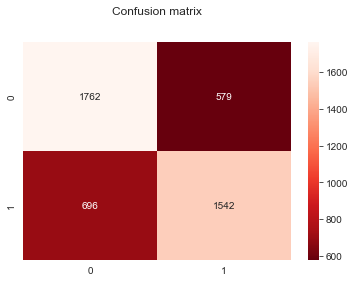

In [27]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,KNN_pred))
print('\n')
plt.title('Confusion matrix', y=1.1)
sns.heatmap(confusion_matrix(y_test,KNN_pred),cmap='Reds_r',annot=True,fmt='g')

## Create Random Forest model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rnd_pred = rnd.predict(X_test)

Random forest

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2341
           1       0.95      0.95      0.95      2238

    accuracy                           0.95      4579
   macro avg       0.95      0.95      0.95      4579
weighted avg       0.95      0.95      0.95      4579





Text(0.5, 1.1, 'Confusion matrix')

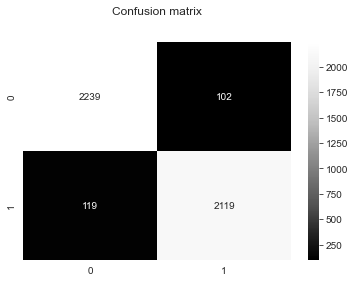

In [30]:
print('Random forest' + '\n')
print(classification_report(y_test,rnd_pred))
print('\n')
sns.heatmap(confusion_matrix(y_test,rnd_pred),cmap='Greys_r',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)